In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Reading and understanding Dataset

In [2]:
df = pd.read_csv("CARDIO_Disease.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df = df.drop(columns=["id"])

In [12]:
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for i in columns:
    q1 = np.percentile(df[i], 25)
    q2 = np.percentile(df[i], 75)
    norm_range = (q2 - q1)*1.5

    lower_outliers = df[df[i] < (q1 - norm_range)]

    
    upper_outliers = df[df[i] > (q2 + norm_range)]

    
    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

    
    df[i] = np.where(df[i] < (q1 - norm_range), q1 - norm_range, df[i])
    df[i] = np.where(df[i] > (q2 + norm_range), q2 + norm_range, df[i])

The number of outliers in age: 0
The number of outliers in height: 0
The number of outliers in weight: 1819
The number of outliers in ap_hi: 1435
The number of outliers in ap_lo: 4632


In [14]:
df.duplicated().sum()

np.int64(24)

In [15]:
df = df.drop_duplicates()

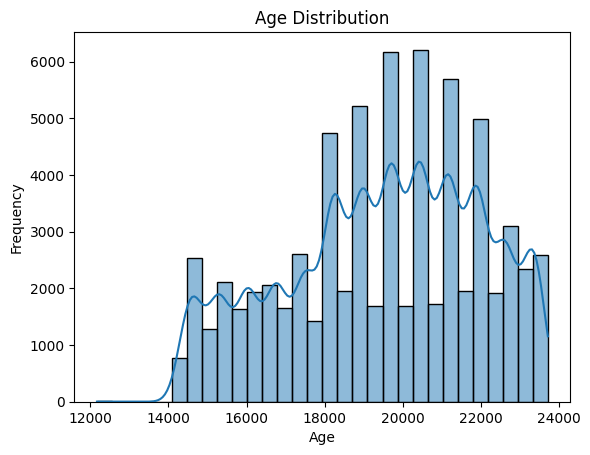

In [16]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


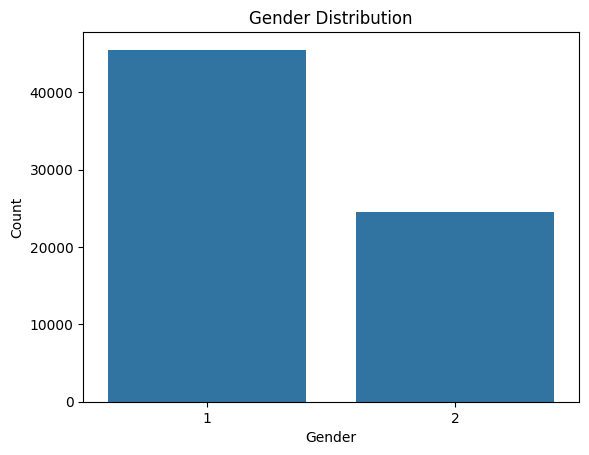

In [17]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

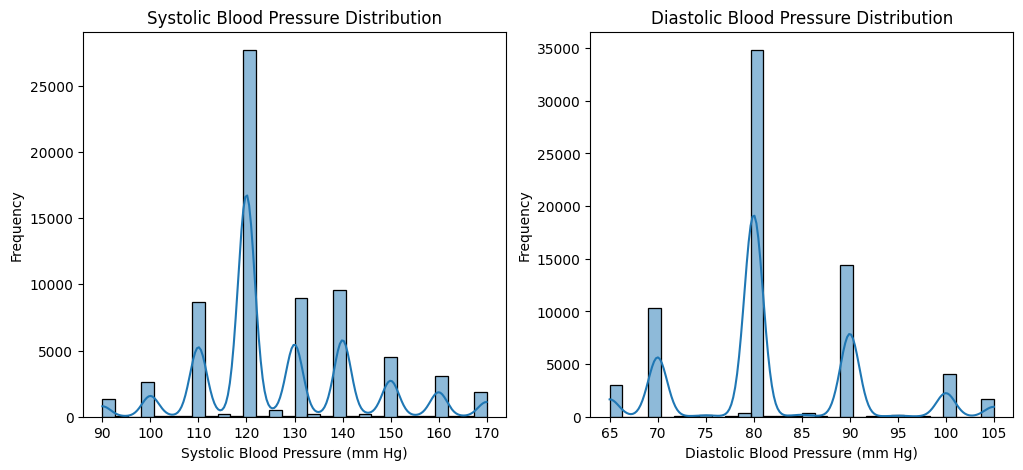

In [18]:

# Blood Pressure Distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['ap_hi'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Systolic Blood Pressure Distribution')
ax[0].set_xlabel('Systolic Blood Pressure (mm Hg)')
ax[0].set_ylabel('Frequency')

sns.histplot(df['ap_lo'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Diastolic Blood Pressure Distribution')
ax[1].set_xlabel('Diastolic Blood Pressure (mm Hg)')
ax[1].set_ylabel('Frequency')

plt.show()

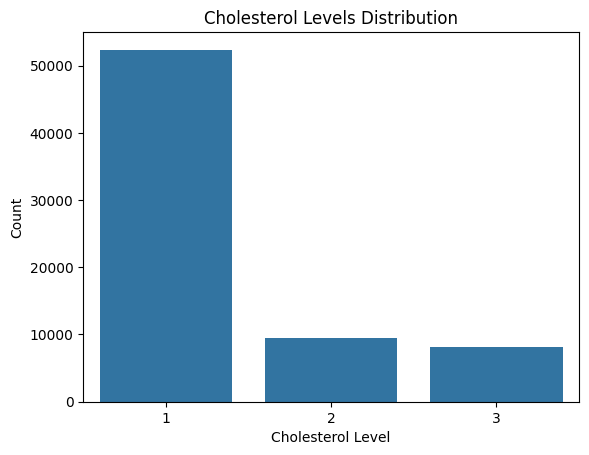

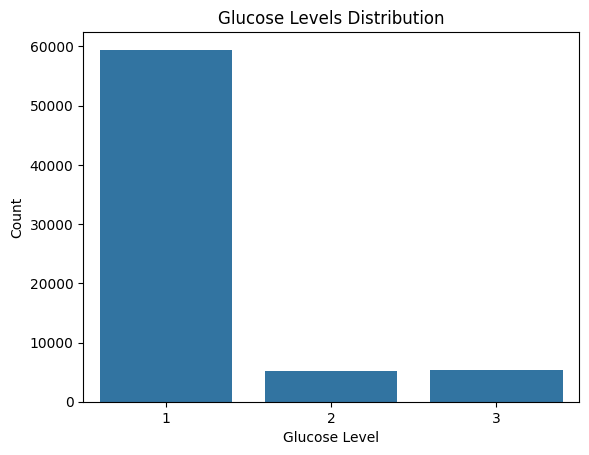

In [19]:
# Cholesterol Levels
sns.countplot(x='cholesterol', data=df)
plt.title('Cholesterol Levels Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

# Glucose Levels
sns.countplot(x='gluc', data=df)
plt.title('Glucose Levels Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()

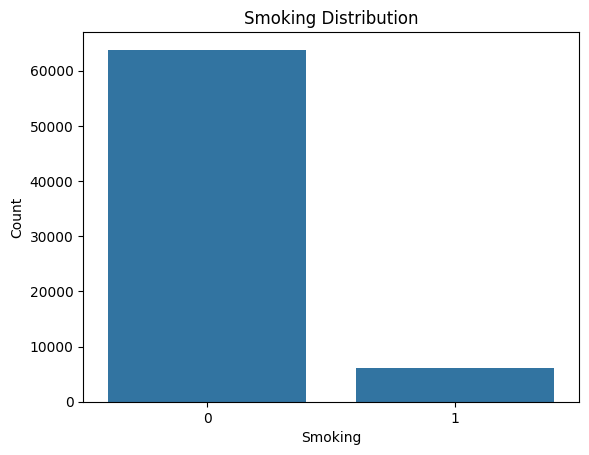

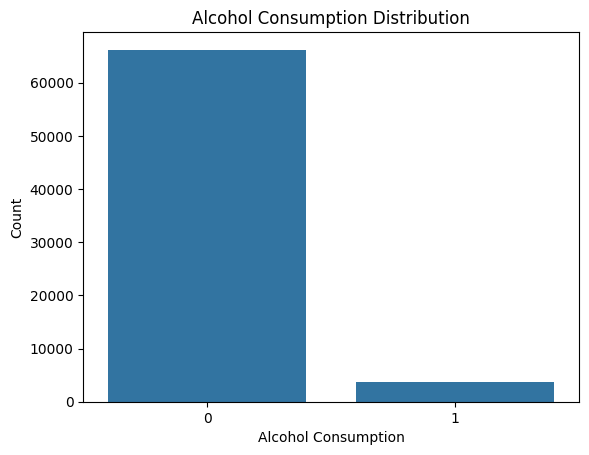

In [20]:
# Smoking Habits
sns.countplot(x='smoke', data=df)
plt.title('Smoking Distribution')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

# Alcohol Consumption
sns.countplot(x='alco', data=df)
plt.title('Alcohol Consumption Distribution')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()

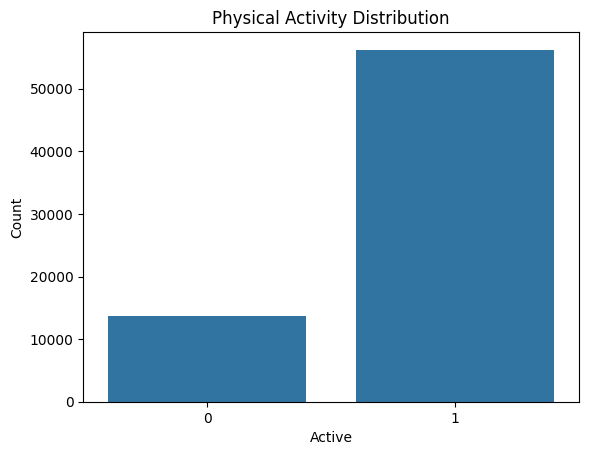

In [21]:
sns.countplot(x='active', data=df)
plt.title('Physical Activity Distribution')
plt.xlabel('Active')
plt.ylabel('Count')
plt.show()


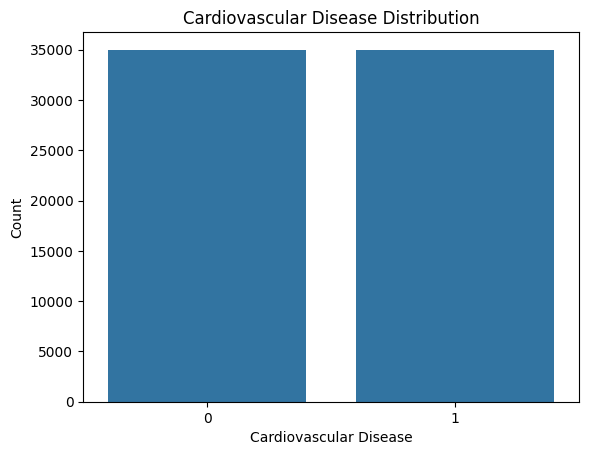

In [22]:
sns.countplot(x='cardio', data=df)
plt.title('Cardiovascular Disease Distribution')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.show()

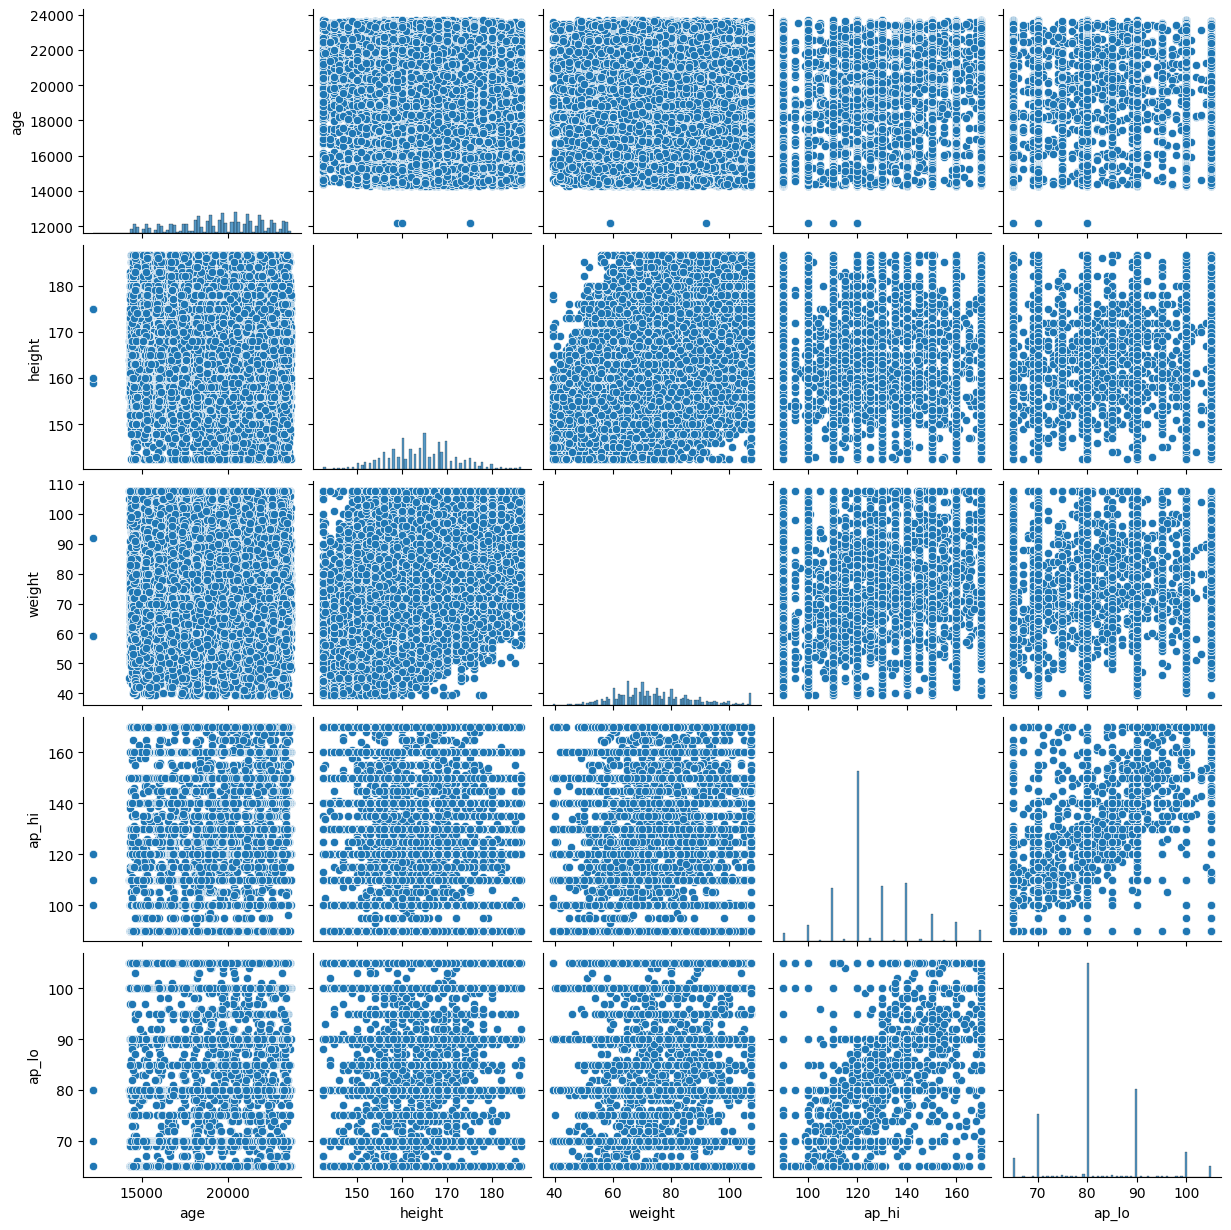

In [23]:
sns.pairplot(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.show()

<Axes: >

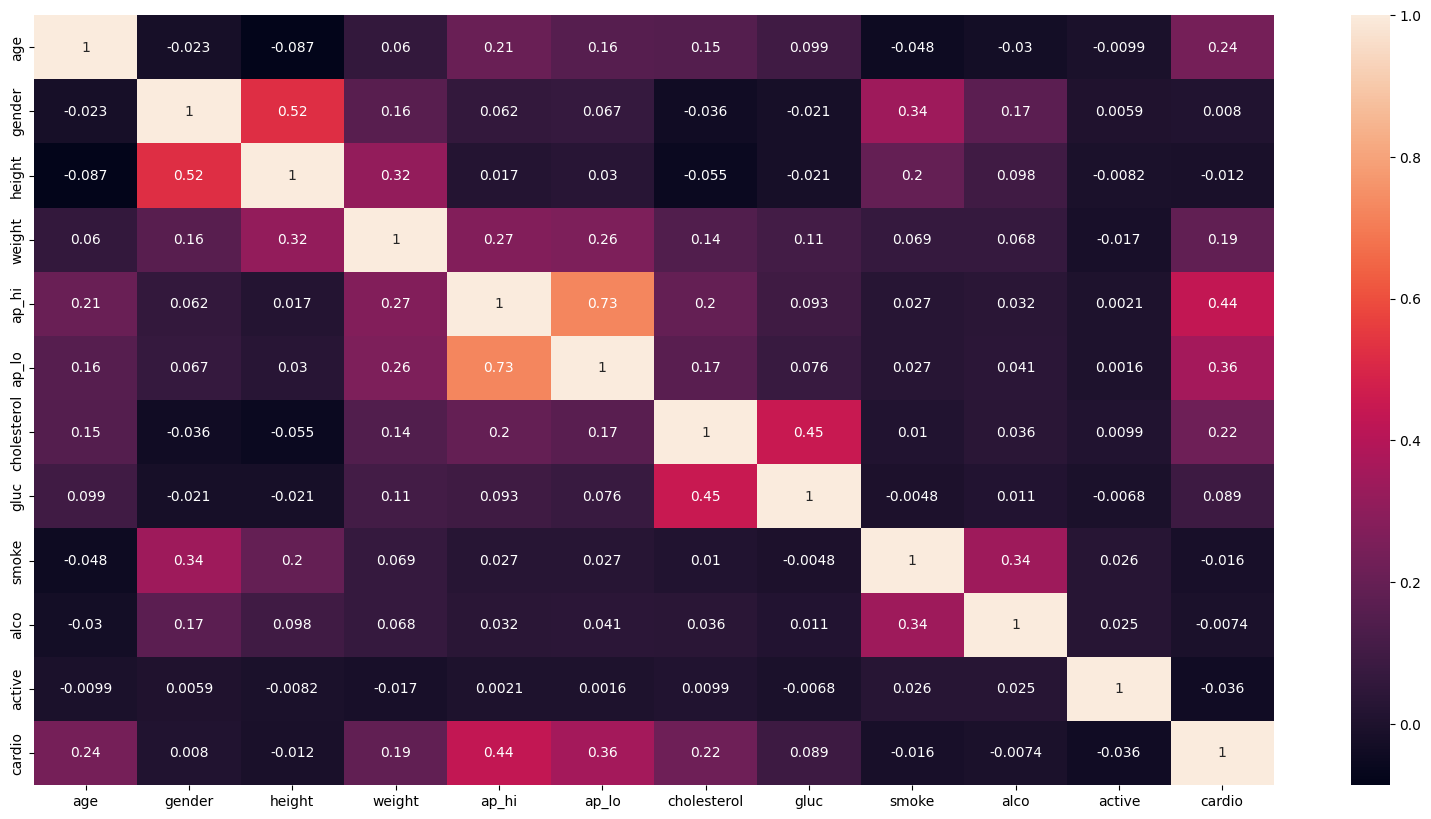

In [24]:
#making correlation on the data
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True)

In [25]:
high_corr = []
low_corr = []
bad_corr = []
for col in df.columns:
  relation = df['cardio'].corr(df[col])
  if(relation > 0):
    if relation >= 0.7 and relation <= 1 :
      # print(f"relation between {col} & diagnosis is high positive \n {relation}")
      high_corr.append(col)
    elif relation >= 0.4 and relation < 0.7 :
      # print(f"relation between {col} & diagnosis is low positive \n {relation}")
      low_corr.append(col)
    else: bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low positive \n {relation}")
  else:
    if relation <= -0.7 and relation > -1 :
      # print(f"relation between {col} & diagnosis is high negative \n {relation}")
      high_corr.append(col)
    elif relation <= -0.4 and relation > -0.7 :
      # print(f"relation between {col} & diagnosis is low negative \n {relation}")
      low_corr.append(col)
    else: bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low negative \n {relation}")

print(f"the high corr are {high_corr}")
print(f"the low corr are {low_corr}")
print(f"the bad corr are {bad_corr}")


the high corr are ['cardio']
the low corr are ['ap_hi']
the bad corr are ['age', 'gender', 'height', 'weight', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


## Creating Training and Testing test

In [30]:
X = df.drop("cardio", axis = 1)
y = df["cardio"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Creating Machine Learning Algorithm

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_rfc = rfc.predict(X_test)

## Accuracy of Model

In [47]:
acc_rfc = accuracy_score(y_test,y_pred_rfc)
prec_rfc = precision_score(y_test,y_pred_rfc)

print("Accuracy:", acc_rfc*100, "%")
print("Precision:",prec_rfc*100,"%")

Accuracy: 71.47756501857674 %
Precision: 71.84635530336098 %
